
Heart disease or Cardiovascular disease (CVD) is a class of diseases that involve the heart or blood vessels. Cardiovascular diseases are the leading cause of death globally. This is true in all areas of the world except Africa. Together CVD resulted in 17.9 million deaths (32.1%) in 2015. Deaths, at a given age, from CVD are more common and have been increasing in much of the developing world, while rates have declined in most of the developed world since the 1970s.
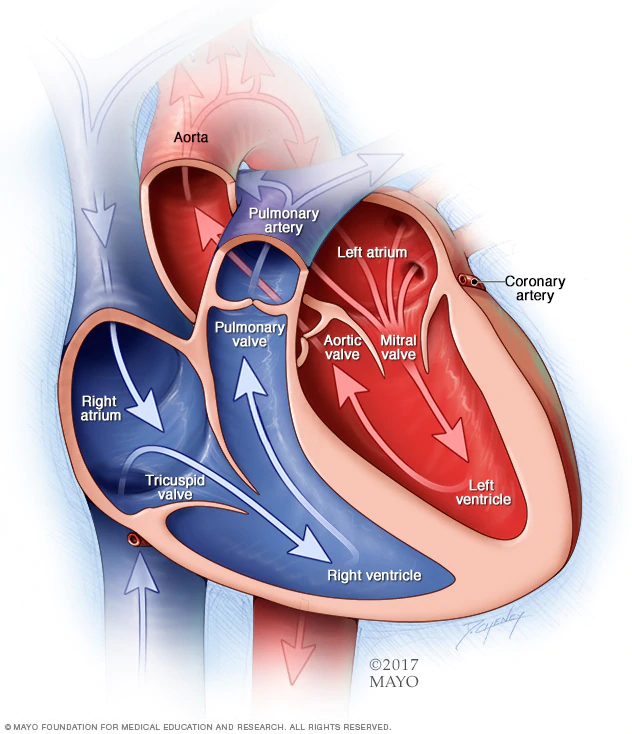


In the project we will be visualising dataset and making a model to predict wheather individual has Heart-disease or not.


In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


****#The dataset contains several columns which are as follows -

age : age in years.

sex : (1 = male; 0 = female)

cp : chest pain type

trestbps : resting blood pressure (in mm Hg on admission to the hospital)

chol : serum cholestoral in mg/dl

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg : resting electrocardiographic results

thalach : maximum heart rate achieved

exang : exercise induced angina (1 = yes; 0 = no)

oldpeak : ST depression induced by exercise relative to rest

slope : the slope of the peak exercise ST segment

ca : number of major vessels (0-3) colored by flourosopy

thal : 3 = normal; 6 = fixed defect; 7 = reversable defect

target : 1 or 0

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")


In [62]:
#ingnore warning
import warnings
warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [66]:
df.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [67]:
df['target'].unique()

array([1, 0])

In [68]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Plot to find number of people with and without HD out of total Number of people 

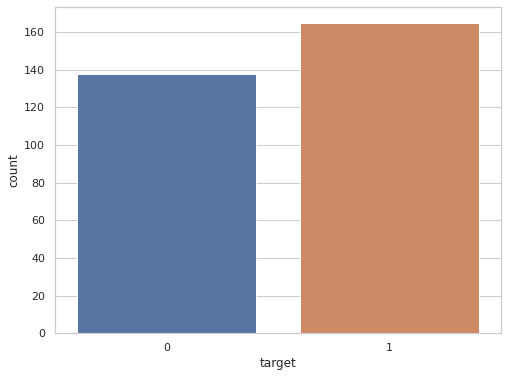

This Plot shows no of patients with or without Heart Disease
1:-True
2:-False


In [69]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df)
plt.show()
print("This Plot shows no of patients with or without Heart Disease\n1:-True\n2:-False")

In [70]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

Plot Showing Number of male and female having HD 

sex 0->Female
    1->male

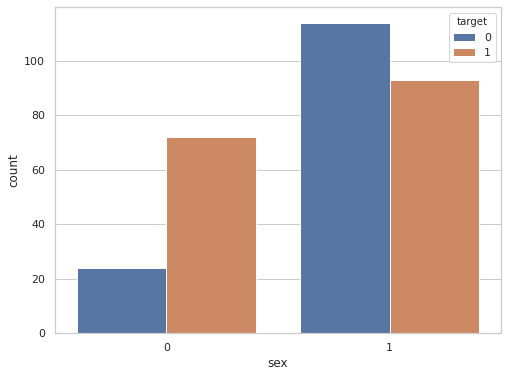

Plot shows no of males and Female with and Without Heart Disease
0:-Female
1:-Male


In [71]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex",hue='target', data=df)
plt.show()
print("Plot shows no of males and Female with and Without Heart Disease\n0:-Female\n1:-Male")

Plot shows no of males and Female with and Without Heart Disease
0:-Female
1:-Male


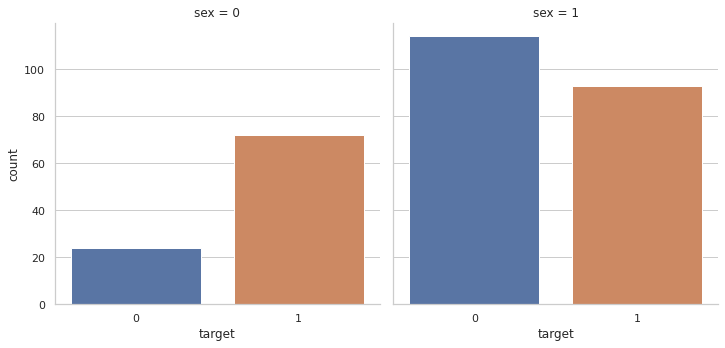

In [72]:
ax = sns.catplot(x='target',col='sex',data = df,kind ='count',height=5,aspect=1)
print("Plot shows no of males and Female with and Without Heart Disease\n0:-Female\n1:-Male")

Plot of relation between target and fbs(fasting blood sugar(1 = true; 0 = false) )

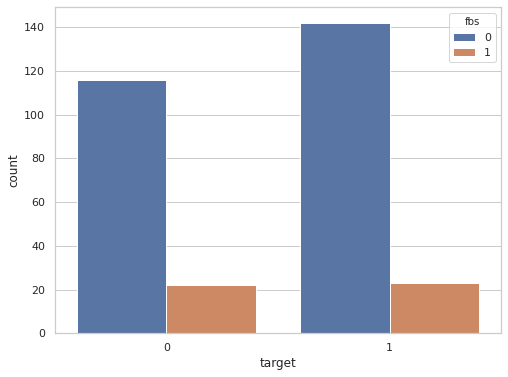

plot shows the relation of fasting blood sugar and Heart Disease


In [73]:
f , ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='target',hue='fbs',data = df)
plt.show()
print('plot shows the relation of fasting blood sugar and Heart Disease')

Plot of relation between target and exang(exercise induced angina (1 = yes; 0 = no))

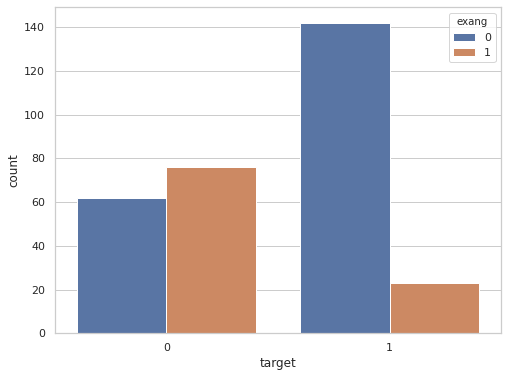

This plot shows relation of Exang and Heart Disease


In [74]:
f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='target',hue = 'exang',data = df)
plt.show()
print("This plot shows relation of Exang and Heart Disease")

In [75]:
corelation = df.corr()

In [76]:
corelation['target'].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [77]:
df['cp'].nunique()

4

In [78]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Plot of HD paitient with different types of CP

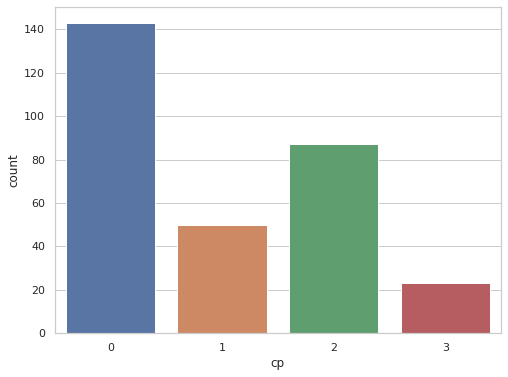

This Plot Shows no of People with Different Chest Pain based On severity


In [79]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", data=df)
plt.show()
print("This Plot Shows no of People with Different Chest Pain based On severity")

Plot of variation of CP with and without HD

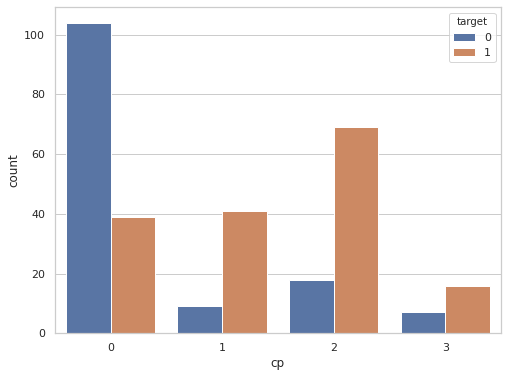

plot shows relation of different chest pain and Heart Disease 


In [80]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = 'cp',hue = 'target',data = df)
plt.show()
print("plot shows relation of different chest pain and Heart Disease ")

Blood rate distribution 

thalach-High Heart rate

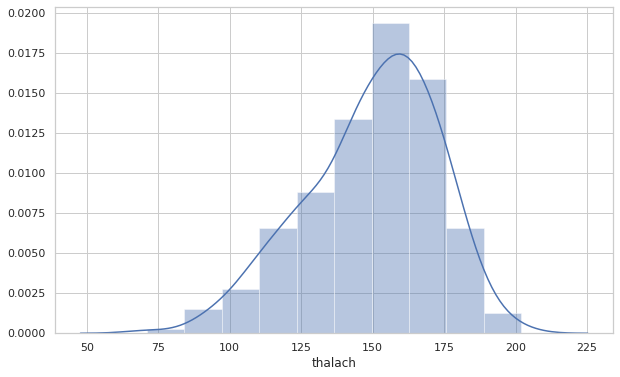

This plot shows thalach Distribution


In [81]:
f, ax = plt.subplots(figsize = (10,6))
x= df['thalach']
ax = sns.distplot(x ,bins=10)
plt.show()
print('This plot shows thalach Distribution')

Variation of target with thalach

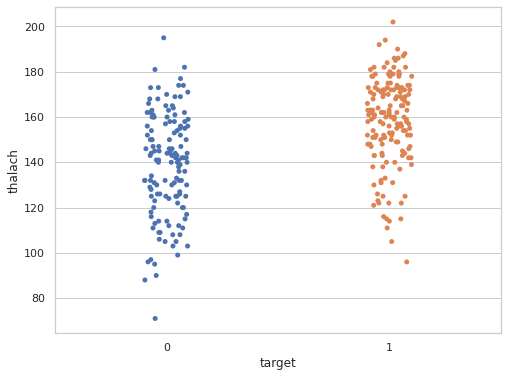

plot shows relation between thalach and Heart Disease


In [82]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df)
plt.show()
print('plot shows relation between thalach and Heart Disease')

Pair Plot

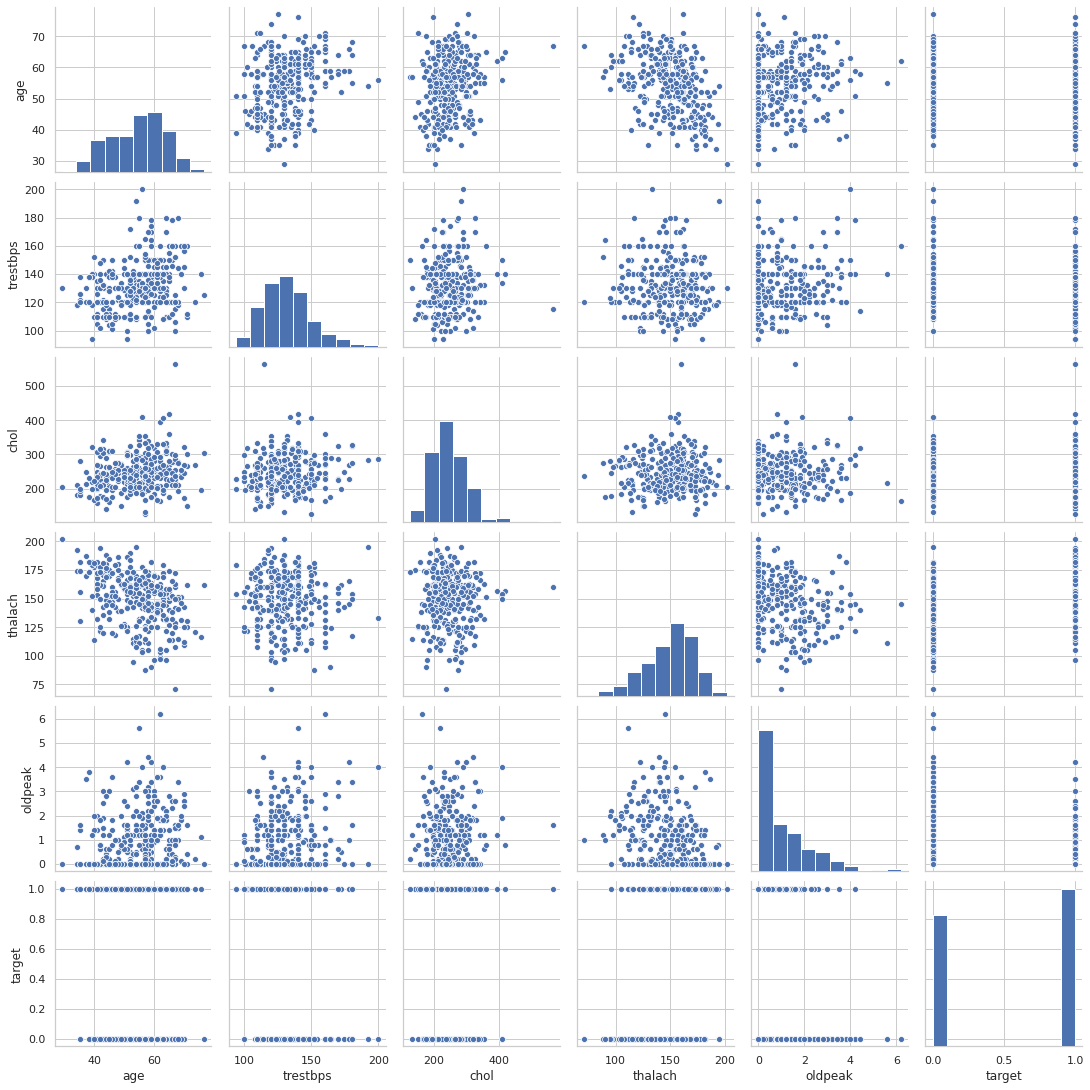

In [83]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

In [84]:
df['age'].nunique()

41

In [85]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

Age distribution of HD Paitients

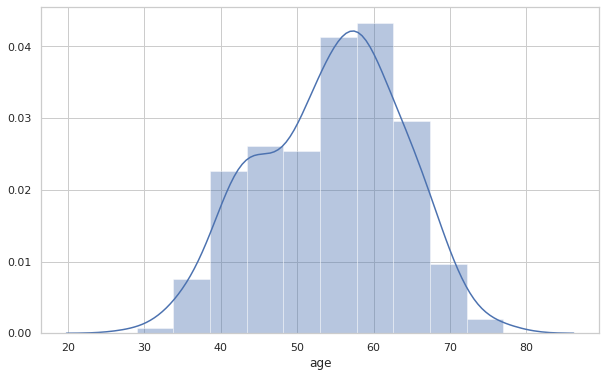

Age Distribution in data


In [86]:
f,ax = plt.subplots(figsize=(10,6))
x=df['age']
ax = sns.distplot(x,bins = 10)
plt.show()
print('Age Distribution in data')

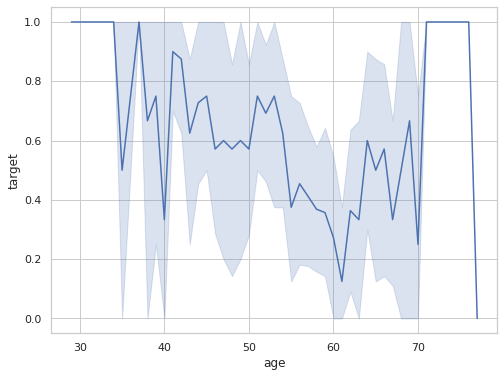

Relation between Age and Heart Disease


In [87]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = 'age',y= 'target' ,data = df)
plt.show()
print('Relation between Age and Heart Disease')

#Prediction Model

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [89]:
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y = df['target']

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state =0)

In [91]:
pipeline_lr = Pipeline([('scaler1',StandardScaler()),
                        ('lr_clasifier',LogisticRegression(random_state=0))])

In [92]:
pipeline_dt = Pipeline([('scaler2',StandardScaler()),
                        ('dt_clasifier',DecisionTreeClassifier())])

In [93]:
pipeline_rf = Pipeline([('scaler3',StandardScaler()),
                        ('rf_clasifier',RandomForestClassifier())])

In [94]:
pipeline_xg = Pipeline([('scaler1',StandardScaler()),
                        ('xg_clasifier',XGBClassifier())])

In [95]:
pipelines = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_xg]

In [96]:
best_accuracy =0.0
best_clasifier = 0
best_pipeline = ""

In [97]:
pipe_dict = {0:'Logistic Regresion',1:'Decision Tree',2:'Random Forest',3:'XG Boost'}

for pipe in pipelines:
    pipe.fit(X_train,y_train)

Logistic Regresion Test Accuracy: 0.8131868131868132
Decision Tree Test Accuracy: 0.7252747252747253
Random Forest Test Accuracy: 0.8461538461538461
XG Boost Test Accuracy: 0.8021978021978022


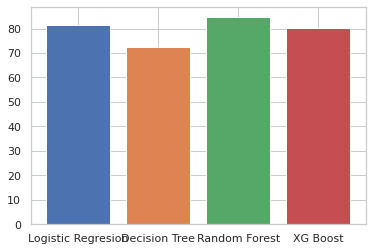

In [98]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))
    plt.bar(x=pipe_dict[i],height= model.score(X_test,y_test)*100,)